<a href="https://colab.research.google.com/github/Johanhms/Learning_Python/blob/main/EDA_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
from sklearn.datasets import fetch_openml

# Fetch the 'adult' dataset from OpenML.
# as_frame=True returns a Pandas DataFrame, which is easier to work with.
adult_data = fetch_openml(name='adult', version=2, as_frame=True)

# The data is stored in the 'frame' attribute
df = adult_data.frame

# Display the first few rows to see the raw data
print("Raw Data:")
print(df.head())

Raw Data:
   age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-country  class 

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  47985 non-null  category
 14  class           48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB


In [38]:
df.groupby(['workclass'])['workclass'].count()

/tmp/ipython-input-1023897036.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['workclass'])['workclass'].count()


,workclass
workclass,
Federal-gov,1432
Local-gov,3136
Never-worked,10
Private,33906
Self-emp-inc,1695
Self-emp-not-inc,3862
State-gov,1981
Without-pay,21


In [39]:
df['education'].value_counts()

,count
education,
HS-grad,15784
Some-college,10878
Bachelors,8025
Masters,2657
Assoc-voc,2061
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,955


In [40]:
# Split the DataFrame based on data types

# Select only numerical columns (integers and floats)
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Select all other columns (non-numerical, typically 'object' type)
non_numerical_df = df.select_dtypes(exclude=['int64', 'float64'])

# Print the columns in each new DataFrame to confirm the split
print("Numerical Columns:")
print(numerical_df.columns)

print("\nNon-numerical Columns:")
print(non_numerical_df.columns)

Numerical Columns:
Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

Non-numerical Columns:
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'class'],
      dtype='object')


In [41]:
# Loop through each categorical column to check for weird values
for col in non_numerical_df:
    print(f"\n--- Analyzing '{col}' ---")
    unique_values = df[col].unique()
    print(f"Number of unique values: {len(unique_values)}")
    print("Top 10 unique values and their counts:")
    print(df[col].value_counts().head(10))

    # You might find values like '?', 'Unknown', or strings with leading/trailing spaces.


--- Analyzing 'workclass' ---
Number of unique values: 9
Top 10 unique values and their counts:
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

--- Analyzing 'education' ---
Number of unique values: 16
Top 10 unique values and their counts:
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
Name: count, dtype: int64

--- Analyzing 'marital-status' ---
Number of unique values: 7
Top 10 unique values and their counts:
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Ma

In [42]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Cleaning Data

In [43]:
# Filter the DataFrame to show rows where 'workclass' is null
df[df.isnull().any(axis = 1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,299831,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K
22,72,NaN,132015,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [44]:
print(df.isnull().sum())

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64


In [45]:
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)

/tmp/ipython-input-2475822218.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)


In [46]:
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)

/tmp/ipython-input-47064902.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)


In [47]:
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)

/tmp/ipython-input-1010998901.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)


In [48]:
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64


#EDA

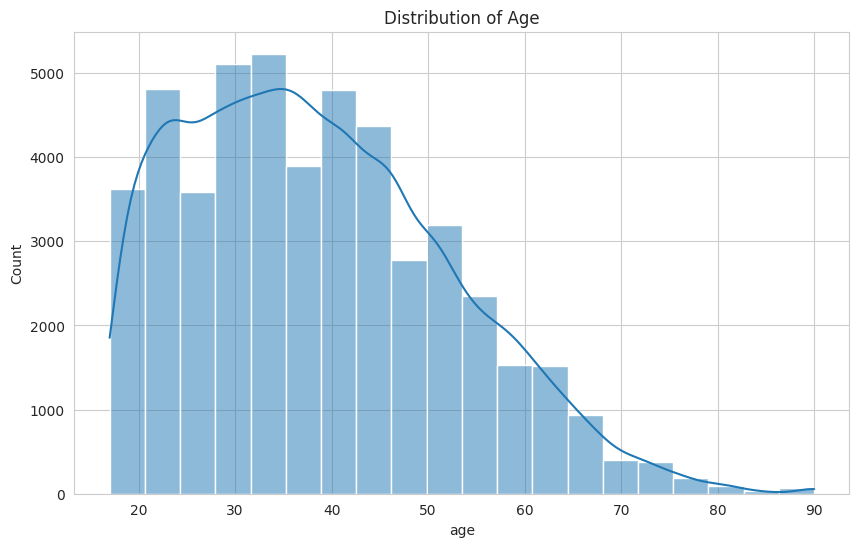

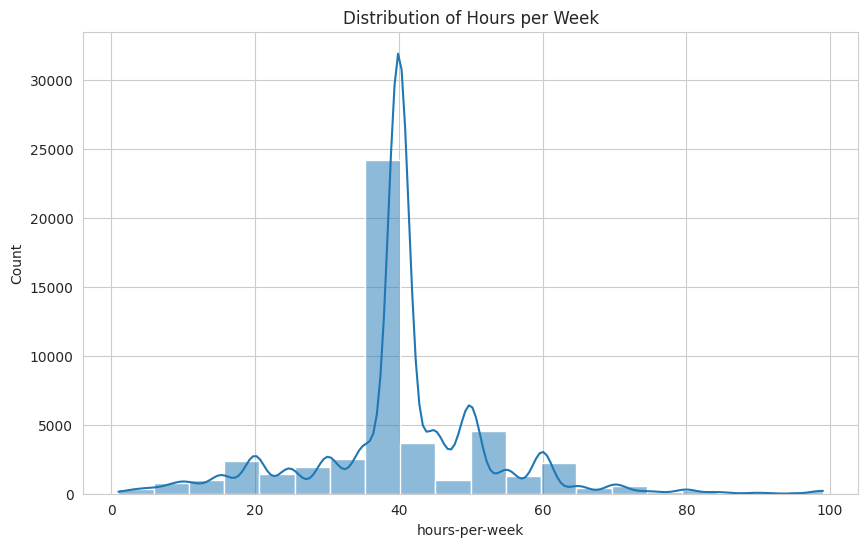

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='hours-per-week', bins=20, kde=True)
plt.title('Distribution of Hours per Week')
plt.show()

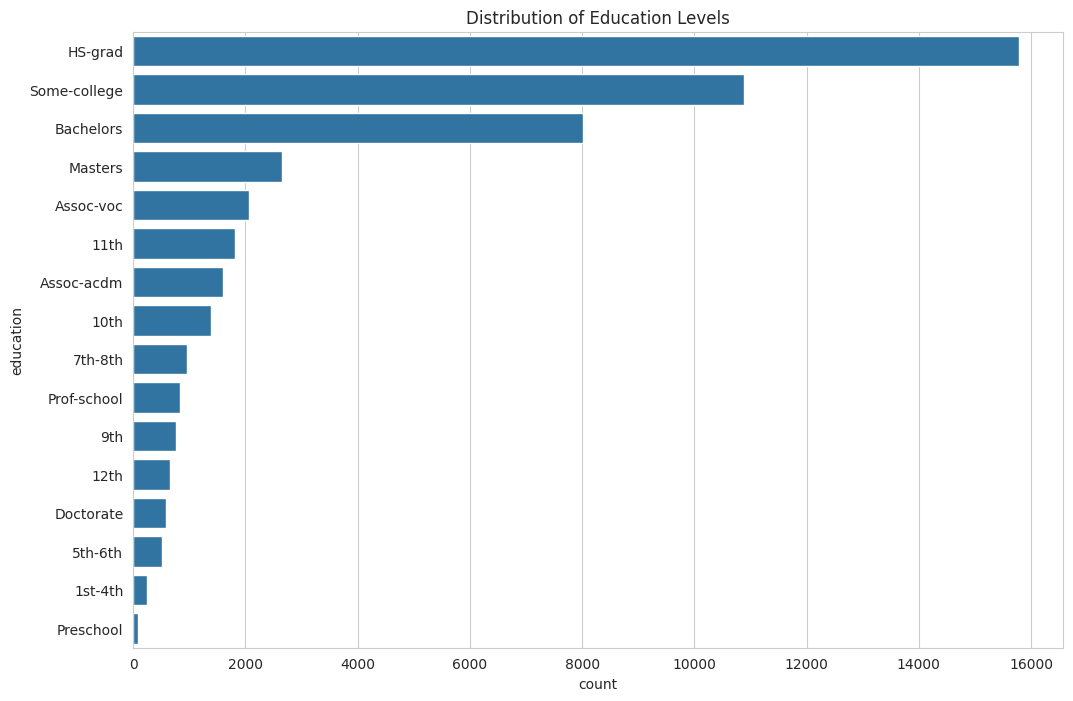

In [57]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='education', order=df['education'].value_counts().index)
plt.title('Distribution of Education Levels')
plt.show()

In [60]:
top_5_education = df['education'].value_counts().nlargest(5).index.tolist()
print("Top 5 education categories:")
print(top_5_education)

df_filtered = df[df['education'].isin(top_5_education)]

crosstab_result = pd.crosstab(df_filtered['education'], df_filtered['class'])

# Add a 'Total' column with the sum of counts for each education level
crosstab_result['Total'] = crosstab_result.sum(axis=1)

# 3. Sort the crosstab result by total count for each education level and display
print("\nCross-tabulation of top 5 Education levels and Income Class (Sorted by Total Count):")
print(crosstab_result.loc[crosstab_result.sort_values(by='Total', ascending=False).index])

Top 5 education categories:
['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc']

Cross-tabulation of top 5 Education levels and Income Class (Sorted by Total Count):
class         <=50K  >50K  Total
education                       
HS-grad       13281  2503  15784
Some-college   8815  2063  10878
Bachelors      4712  3313   8025
Masters        1198  1459   2657
Assoc-voc      1539   522   2061


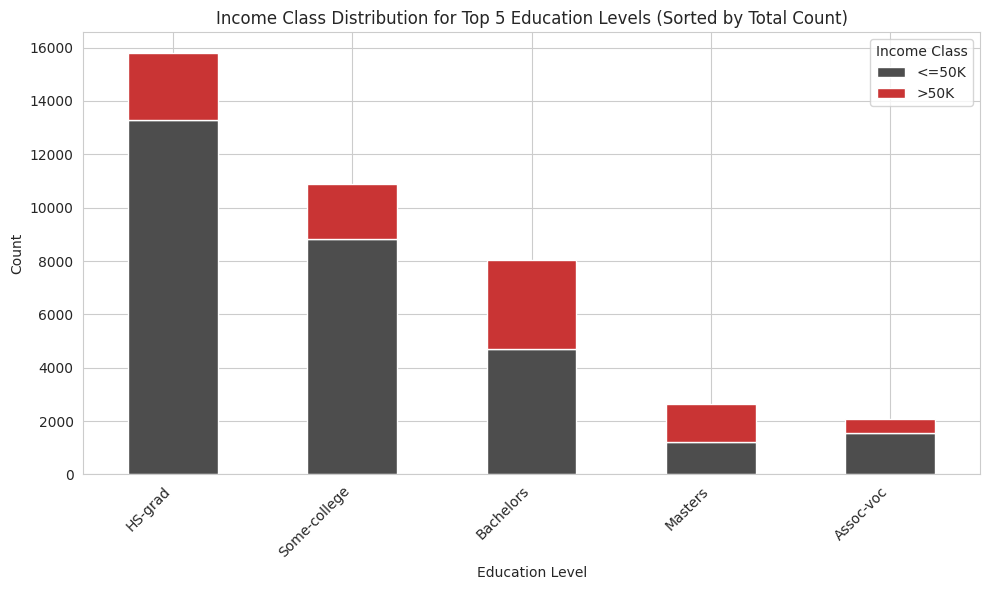

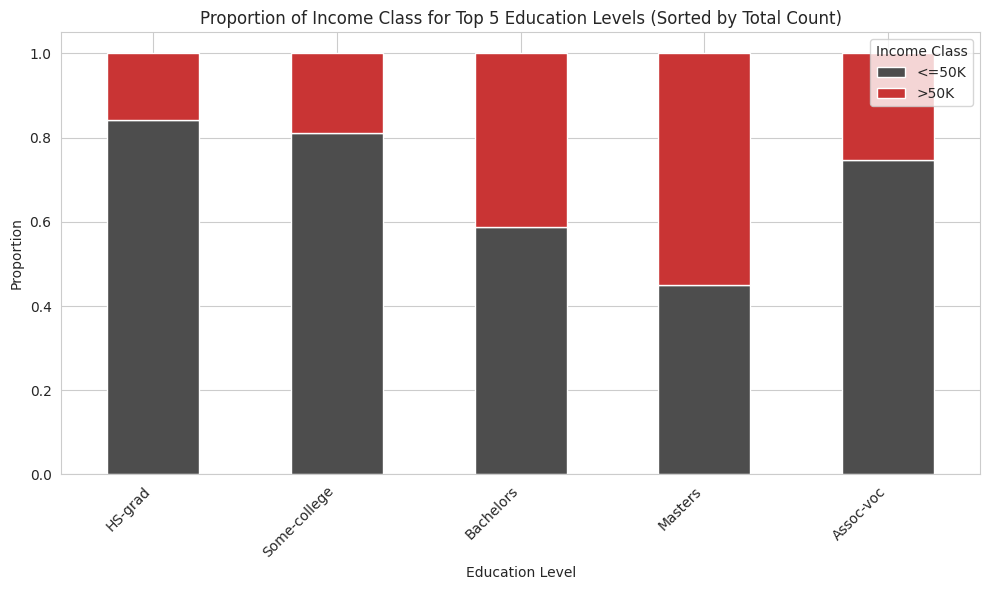


Total count for top 5 education levels:
39405


In [63]:
# Sort the crosstab result by total count for each education level
crosstab_result_sorted = crosstab_result.loc[crosstab_result.sum(axis=1).sort_values(ascending=False).index]

# Drop the 'Total' column for the first plot
crosstab_result_sorted_plot = crosstab_result_sorted.drop(columns=['Total'])

# Create the stacked bar chart
crosstab_result_sorted_plot.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4d4d4d', '#c93434'])
plt.title('Income Class Distribution for Top 5 Education Levels (Sorted by Total Count)')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income Class')
plt.tight_layout()
plt.show()

# To plot proportions instead, you can normalize the crosstab first.
crosstab_proportions = pd.crosstab(df_filtered['education'], df_filtered['class'], normalize='index')

# Sort the proportions crosstab using the same order as the total counts
crosstab_proportions_sorted = crosstab_proportions.loc[crosstab_result.sum(axis=1).sort_values(ascending=False).index]

crosstab_proportions_sorted.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4d4d4d', '#c93434'])
plt.title('Proportion of Income Class for Top 5 Education Levels (Sorted by Total Count)')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income Class')
plt.tight_layout()
plt.show()

# Print the total count from the crosstab_result DataFrame
print("\nTotal count for top 5 education levels:")
print(crosstab_result['Total'].sum())

Cross-tabulation of Gender and Income Class:
class   <=50K  >50K
sex                
Female  14423  1769
Male    22732  9918
class       <=50K       >50K
sex                         
Female  89.074852  10.925148
Male    69.623277  30.376723


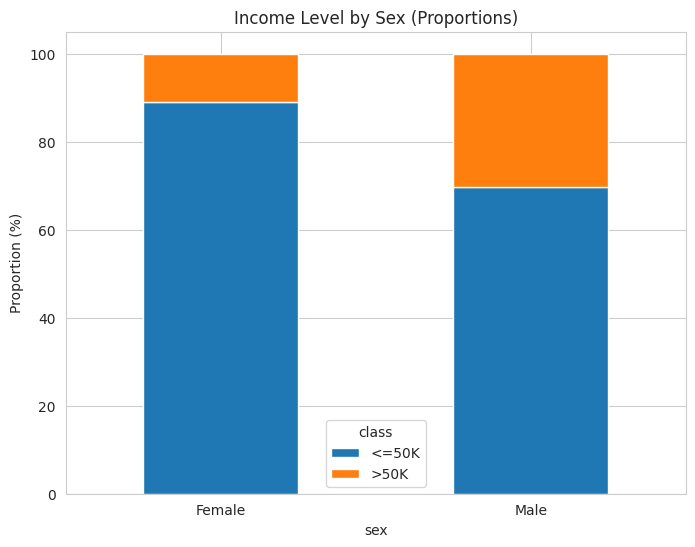

In [ ]:
# Create a crosstab to see the relationship between sex and income

sex_by_class = pd.crosstab(index=df['sex'], columns=df['class'])

print("Cross-tabulation of Gender and Income Class:")
print(sex_by_class)

sex_income_crosstab = pd.crosstab(df['sex'], df['class'], normalize='index') * 100
print(sex_income_crosstab)

# Visualize with a stacked bar plot
sex_income_crosstab.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Income Level by Sex (Proportions)')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=0)
plt.show()

In [66]:
crosstab_result_sex = pd.crosstab(
    index=df_filtered['education'],
    columns=[df_filtered['sex'], df_filtered['class']]
)
print("Multi-dimensional Crosstab:")
print(crosstab_result_sex)

Multi-dimensional Crosstab:
sex          Female       Male      
class         <=50K >50K <=50K  >50K
education                           
Assoc-voc       641   93   898   429
Bachelors      1956  521  2756  2792
HS-grad        4767  330  8514  2173
Masters         555  290   643  1169
Some-college   3885  293  4930  1770


Crosstab of Education and Sex:
sex           Female   Male
education                  
Assoc-voc        734   1327
Bachelors       2477   5548
HS-grad         5097  10687
Masters          845   1812
Some-college    4178   6700


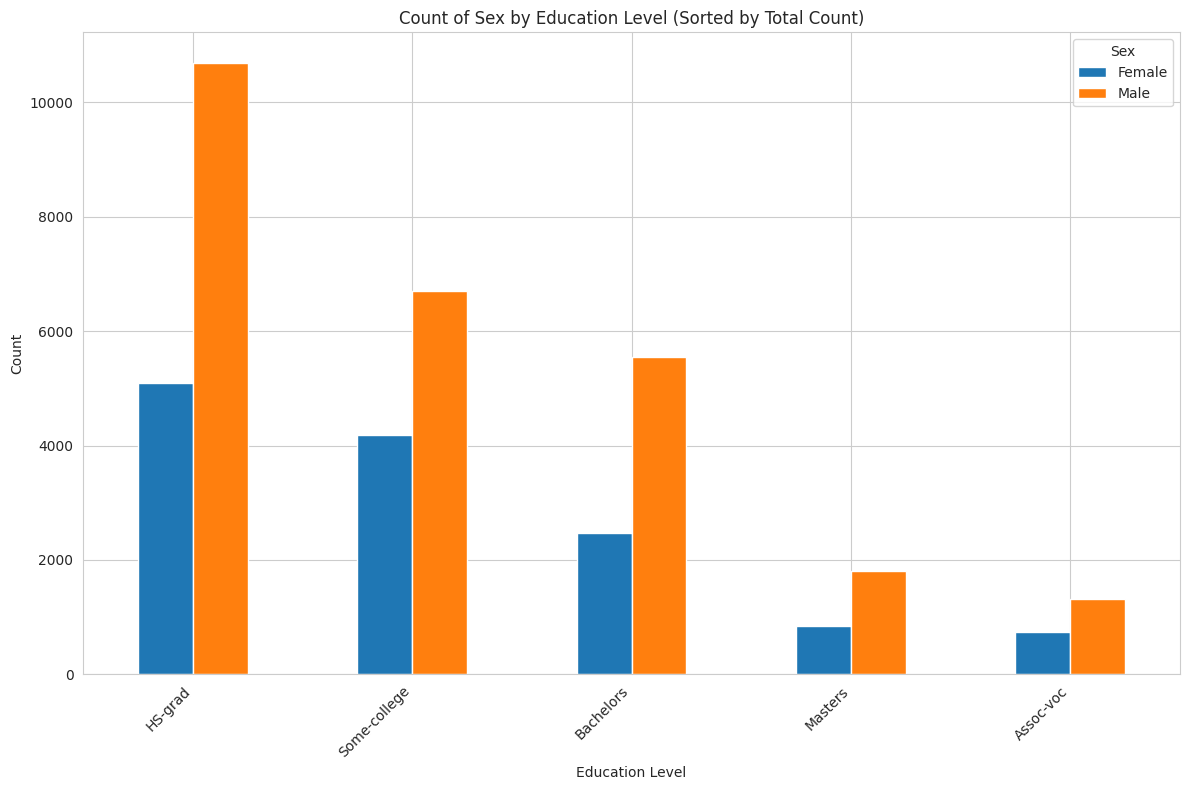

In [75]:
# Create a crosstab of education and sex
crosstab_result_sex = pd.crosstab(
    index=df_filtered['education'],
    columns=df_filtered['sex']
)
print("Crosstab of Education and Sex:")
print(crosstab_result_sex)

# Sort the crosstab result by the sum of counts for each education level
crosstab_result_sex_sorted = crosstab_result_sex.loc[crosstab_result_sex.sum(axis=1).sort_values(ascending=False).index]

# Create a grouped bar chart of counts
crosstab_result_sex_sorted.plot(kind='bar', figsize=(12, 8))
plt.title('Count of Sex by Education Level (Sorted by Total Count)')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

Crosstab of Education and Sex:
sex           Female   Male
education                  
Assoc-voc        734   1327
Bachelors       2477   5548
HS-grad         5097  10687
Masters          845   1812
Some-college    4178   6700


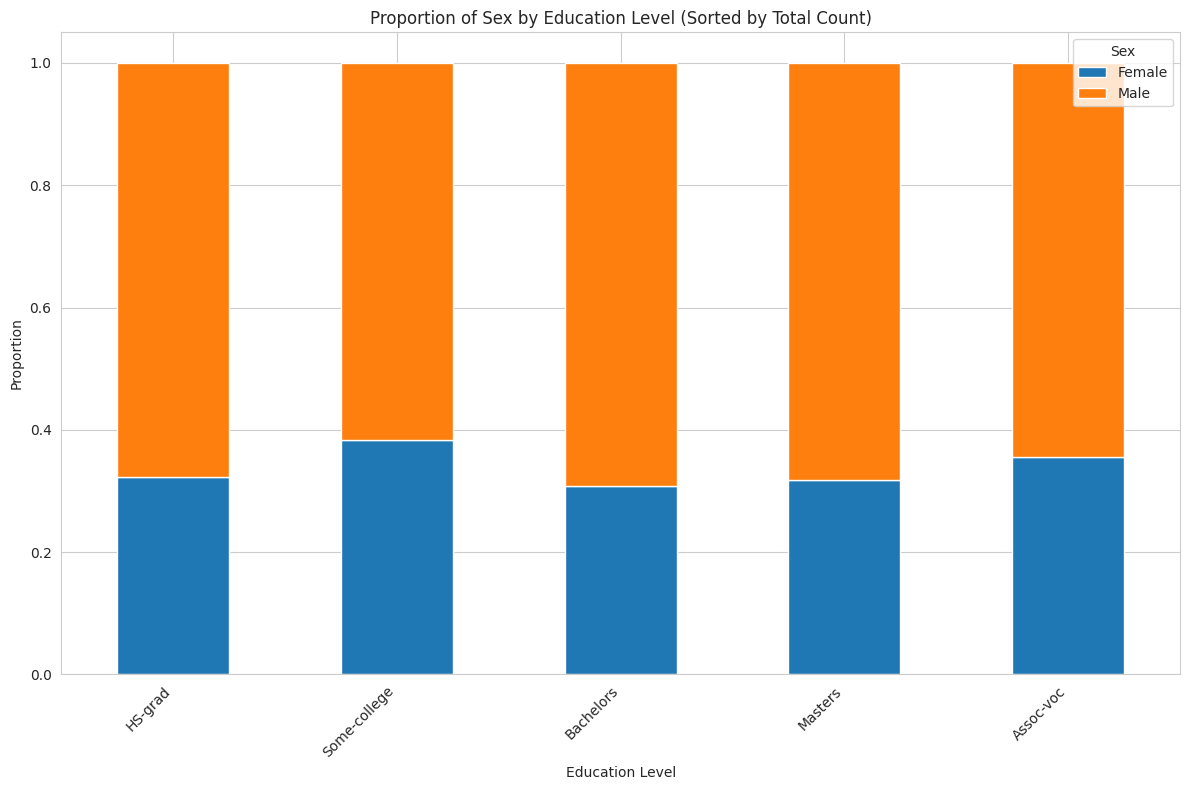

In [77]:
# Create a crosstab of education and sex
crosstab_result_sex = pd.crosstab(
    index=df_filtered['education'],
    columns=df_filtered['sex']
)
print("Crosstab of Education and Sex:")
print(crosstab_result_sex)

# Sort the crosstab result by the sum of counts for each education level
crosstab_result_sex_sorted = crosstab_result_sex.loc[crosstab_result_sex.sum(axis=1).sort_values(ascending=False).index]

# Calculate proportions
crosstab_proportions_sex = crosstab_result_sex_sorted.apply(lambda x: x / x.sum(), axis=1)

# Create a stacked bar chart of proportions
crosstab_proportions_sex.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Proportion of Sex by Education Level (Sorted by Total Count)')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

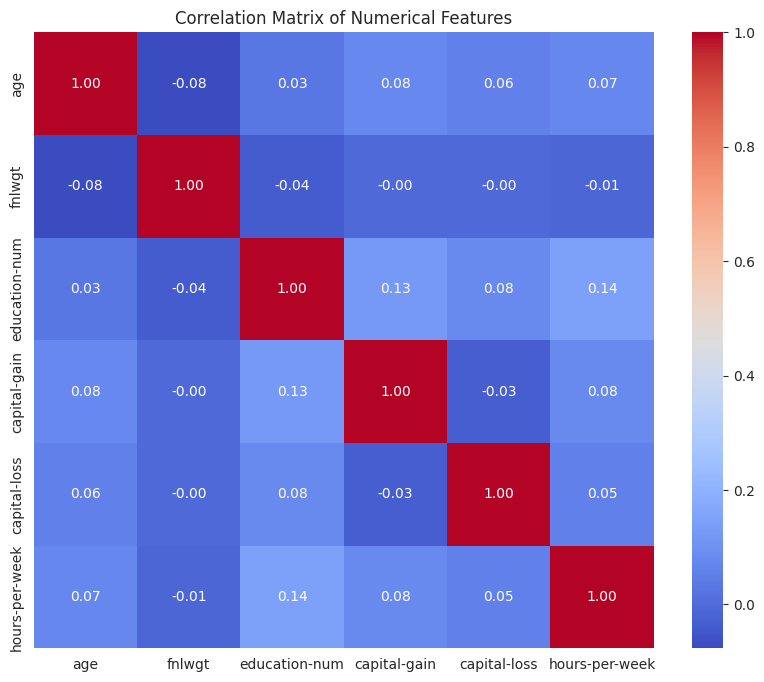

In [ ]:
# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()